#### Projeto - Dados do Titanic
#### Curso - Fundamentos de Data Science

#### Aluno Leandro Baruch 

# RMS Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.
___Fonte: Wikipedia___


### Base de Dados

A base de dados utilizada nesse estudo é um arquivo disponibilizado no site Kaggle, contendo informações sobre 891 dos, segundo a Wikipedia, 2435 passageiros da embarcação.


### Roteiro

Para concluir o estudo, terei que realizar perguntas que deverão ser respondidas após a análise dos dados. Os dados em questão deverão ser trabalhados para que no momento das respostas, tenhamos uma base de dados limpa de modo a não interferir nos estudos.

***

### Perguntas

1 - Classifique os passageiros por gênero e idade, sendo 0 a 12 anos, criança; 13 a 18 anos, jovem; acima de 18 anos, adulto;

2 - Liste quais portos foram utilizados e quantas vezes;

3 - Liste a tarifa média paga, separando por classe;

4 - Identifique características que mais influenciaram na sobrevivência dos passageiros. Considere a classe, idade, gênero e se possuía parentes embarcados;

5 - Curiosidade: o porto utilizado para embarcar, influenciou de alguma forma na sobrevivência dos passageiros?


In [2]:
#importar Bibliotecas e o arquivo fonte dos dados.
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic-data-6.csv')


In [3]:
#Analisando as primeiras linhas
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### LIMPEZA


Inicialmente, notei alguns valores em branco. Portanto vou contabilizar isso e identificar possíveis colunas que podem ser retiradas da análise.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__Para a coluna "Cabin", temos apenas 204 amostras de um total de 891 entradas. Considerar tal valor não irá agregar nada para a análise, portanto irei retirar a coluna.__

In [5]:
#Irei criar uma função de Drop para facilitar o drop de colunas

def drop(data, column):
    data.drop([column], axis=1, inplace=True)
    
    """
    Função que utiliza drop de uma coluna em um Dataframe

    Parâmetros:
    data -- nome do Dataframe
    column -- nome da coluna a realizar o drop

    Output:
    Exclui a coluna mencionada
    """

In [6]:
#Utilizar a função drop para retirar a coluna Cabin
drop(df, 'Cabin')

In [7]:
#Conferir que a coluna Cabin foi excluída do DF
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


__Para a coluna "Age", por possuir algumas entradas em branco mas em proporção menor que a coluna "Cabin", irei considerar a média para preencher tais valores.__

In [8]:
df.Age.mean()
print("A idade média dos passageiros é de {}.".format(df.Age.mean()))
print("Vou considerar {} anos.".format(int(df.Age.mean())))

A idade média dos passageiros é de 29.69911764705882.
Vou considerar 29 anos.


In [9]:
df["Age"].fillna(29, inplace=True)

In [10]:
#Verificando as primeiras linhas, idades em branco preenchidas.
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [11]:
#Verificando valores em branco...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


__Temos apenas 2 valores em branco, que são os portos utilizados. Essa falta de informação não irá impactar em nosso estudo, portanto vamos seguir.__

### LIMPEZA

Para responder as perguntas acima, identifiquei que a coluna "Ticket" pode ser descartada.

Portanto...

In [12]:
#retirando a coluna Ticket com a função drop
drop(df, 'Ticket')

In [13]:
#Novo DF sem a coluna Ticket

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


__Agora com os dados limpos e organizados, vamos responder as perguntas...__

### Pergunta 1

##### Classifique os passageiros por gênero e idade, sendo 0 a 12 anos, criança; 13 a 18 anos, jovem; acima de 18 anos, adulto;

In [14]:
#Criando um novo dataframe para responder a pergunta 1
df2 = df[["Sex", "Age"]].copy()

In [15]:
#definindo uma função para criar a classificação
def definition(age):
    if age >= 18:
        return 'Adulto'
    elif age >= 12:
        return 'Jovem'
    return 'Criança'


In [16]:
#acrescentando a coluna no dataframe
df2['Classification'] = df2['Age'].map(definition)

In [17]:
print("A quantidade de crianças do sexo masculino é de {}".format(len(df2.loc[df2['Classification'] == 'Criança'].loc[df2['Sex'] == 'male'])))
print("A quantidade de crianças do sexo feminino é de {}".format(len(df2.loc[df2['Classification'] == 'Criança'].loc[df2['Sex'] == 'female'])))
print("A quantidade de jovens do sexo masculino é de {}".format(len(df2.loc[df2['Classification'] == 'Jovem'].loc[df2['Sex'] == 'male'])))
print("A quantidade de jovens do sexo feminino é de {}".format(len(df2.loc[df2['Classification'] == 'Jovem'].loc[df2['Sex'] == 'female'])))
print("A quantidade de adultos do sexo masculino é de {}".format(len(df2.loc[df2['Classification'] == 'Adulto'].loc[df2['Sex'] == 'male'])))
print("A quantidade de adultos do sexo feminino é de {}".format(len(df2.loc[df2['Classification'] == 'Adulto'].loc[df2['Sex'] == 'female'])))

A quantidade de crianças do sexo masculino é de 36
A quantidade de crianças do sexo feminino é de 32
A quantidade de jovens do sexo masculino é de 22
A quantidade de jovens do sexo feminino é de 23
A quantidade de adultos do sexo masculino é de 519
A quantidade de adultos do sexo feminino é de 259


C:\Users\baruch\Anaconda3\envs\projeto2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Quantidade'), Text(0.5,0,'Passageiros por sexo e classe')]

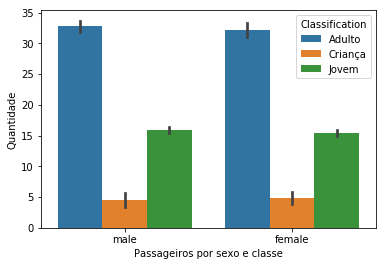

In [18]:
bps = sns.barplot(x='Sex', y='Age', hue='Classification', data=df2)
bps.set(ylabel='Quantidade', xlabel='Passageiros por sexo e classe')


### Conclusão da Resposta 1

A quantidade de crianças do sexo masculino é de 36

A quantidade de crianças do sexo feminino é de 32

A quantidade de jovens do sexo masculino é de 22

A quantidade de jovens do sexo feminino é de 23

A quantidade de adultos do sexo masculino é de 519

A quantidade de adultos do sexo feminino é de 259

***

### Pergunta 2

##### Liste quais portos foram utilizados e quantas vezes;

In [36]:
#Criar variável para ser utilizada na resposta com o format.
embarked = df["Embarked"].value_counts()

In [21]:
print("A estação Southampton foi utilizada {} vezes.".format(embarked[0]))
print("A estação Cherbourg foi utilizada {} vezes.".format(embarked[1]))
print("A estação Queenstown foi utilizada {} vezes.".format(embarked[2]))

A estação Southampton foi utilizada 644 vezes.
A estação Cherbourg foi utilizada 168 vezes.
A estação Queenstown foi utilizada 77 vezes.


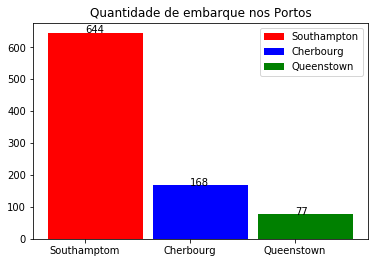

In [74]:
#Criar gráfico demonstrativo

#criação das barras
barWidth = 0.9
bars1 = [embarked[0]]
bars2 = [embarked[1]]
bars3 = [embarked[2]]
bars4 = bars1 + bars2 + bars3

#Posicionamento das barras
r1 = [1]
r2 = [2]
r3 = [3]
r4 = r1 + r2 + r3

#Criação do barplot
plt.bar(r1, bars1, width = barWidth, color = ('red'), label='Southampton')
plt.bar(r2, bars2, width = barWidth, color = ('blue'), label='Cherbourg')
plt.bar(r3, bars3, width = barWidth, color = ('green'), label='Queenstown')

#Criar legenda
plt.legend()

#Label do eixo X
plt.xticks([r + barWidth for r in range(len(r4))], ['Southamptom', 'Cherbourg', 'Queenstown'])

# Criar labels das barras
label = ['644', '168', '77']

#Colocar a label nas barras
for i in range(len(r4)):
    plt.text(x = r4[i]-0.10 , y = bars4[i]+0.1, s = label[i], size = 10)

plt.subplots_adjust(bottom= 0.15, top = 0.9)
plt.title('Quantidade de embarque nos Portos')
plt.show()


### Conclusão da Resposta 2

O porto mais utilizado foi o de Southampton, com 644 embarques.

### Pergunta 3

##### Liste a tarifa média paga, separando por classe;

In [22]:
#Criar variável para ser utilizada na resposta com o format.
fare = df.groupby("Pclass").Fare.mean()

In [23]:
print("Tarifa média da Primeira Classe: {0}.".format(fare[1]))
print("Tarifa média da Segunda Classe: {0}.".format(fare[2]))
print("Tarifa média da Terceira Classe: {0}.".format(fare[3]))

Tarifa média da Primeira Classe: 84.15468749999992.
Tarifa média da Segunda Classe: 20.66218315217391.
Tarifa média da Terceira Classe: 13.675550101832997.


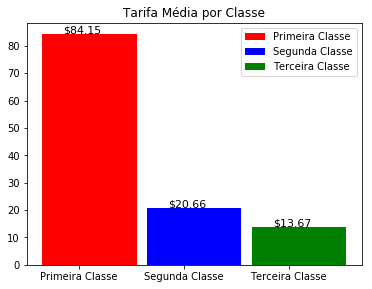

In [72]:
#Criar gráfico demonstrativo

#criação das barras
barWidth = 0.9
bars1 = [fare[1]]
bars2 = [fare[2]]
bars3 = [fare[3]]
bars4 = bars1 + bars2 + bars3

#Posicionamento das barras
r1 = [1]
r2 = [2]
r3 = [3]
r4 = r1 + r2 + r3

#Criação do barplot
plt.bar(r1, bars1, width = barWidth, color = ('red'), label='Primeira Classe')
plt.bar(r2, bars2, width = barWidth, color = ('blue'), label='Segunda Classe')
plt.bar(r3, bars3, width = barWidth, color = ('green'), label='Terceira Classe')

#Criar legenda
plt.legend()

#Label do eixo X
plt.xticks([r + barWidth for r in range(len(r4))], ['Primeira Classe', 'Segunda Classe', 'Terceira Classe'])

# Criar labels das barras
label = ['$84.15', '$20.66', '$13.67']

#Colocar a label nas barras
for i in range(len(r4)):
    plt.text(x = r4[i]-0.25 , y = bars4[i]+0.5, s = label[i], size = 11)

plt.subplots_adjust(bottom= 0.15, top = 0.99)

plt.title('Tarifa Média por Classe')

plt.show()

### Conclusão da Resposta 3

Como esperado, o valor médio pago da primeira classe foi o maior. No entanto, como podemos ver nos gráficos acima, a diferenção foi muito maior. Quatro vezes maior que da segunda classe. Por outro lado, a diferença de valores entre Segunda e Terceira classe foi razoável. 

### Pergunta 4
#### Identifique características que mais influenciaram na sobrevivência dos passageiros. Considere a classe, idade, gênero e se possuía parentes embarcados.

In [25]:
#criando um dataframe para listar somente quem morreu e outro para listar somente quem sobreviveu
df_s0 = df.query("Survived == 0")
df_s1 = df.query("Survived == 1")

In [26]:
#valores médios de quem morreu
df_s0.mean()

PassengerId    447.016393
Survived         0.000000
Pclass           2.531876
Age             30.255920
SibSp            0.553734
Parch            0.329690
Fare            22.117887
dtype: float64

In [27]:
# Como o gênero é uma string, a função mean não o trouxe. Vamos calculá-la agora...
df_s0.groupby('Sex').count()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,81,81,81,81,81,81,81,81,81
male,468,468,468,468,468,468,468,468,468


In [28]:
#valores médios de quem sobreviveu
df_s1.mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.443480
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

In [29]:
# Agora vamos calcular o gênero de quem sobreviveu
df_s1.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,233,233,233,233,233,233,233,233,231
male,109,109,109,109,109,109,109,109,109


### Conclusão da Resposta 4

É possível notar, que com esses dados acima, a situação que mais inteferiu na sobrevivência dos passageiros foi em qual classe ele estava hospedado no navio. O que nos leva a crer que passageiros de primeira classe tiveram privilégio no resgate em relação a passageiros de terceira classe.
Em relação atributos pessoais, o gênero afetou drasticamente a sobrevivência dos passageiros, onde temos 549 pessoas que morreram, dentre elas apenas 81 mulheres, enquanto dentre os 342 sobreviventes, 233 são mulheres. Isso já era esperado pois em casos como esse mulheres são resgatadas primeiro.

### Pergunta 5

#### Curiosidade: o porto utilizado para embarcar, influenciou de alguma forma na sobrevivência dos passageiros?

In [30]:
#Convertendo a sigla dos valores para os nomes reais.
df3 = df[["Survived", "Embarked"]].copy()

In [31]:
#criando variáveis
station_s = (len(df3.loc[df3['Embarked'] == "S"]))
station_c = (len(df3.loc[df3['Embarked'] == "C"]))
station_q = (len(df3.loc[df3['Embarked'] == "Q"]))
station_s_survived = (len(df3.loc[df3['Embarked'] == 'S'].loc[df3['Survived'] == 1]))
station_c_survived = (len(df3.loc[df3['Embarked'] == 'C'].loc[df3['Survived'] == 1]))
station_q_survived = (len(df3.loc[df3['Embarked'] == 'Q'].loc[df3['Survived'] == 1]))

In [32]:
print("A taxa de sobrevivência de passageiros que embarcaram na estação Southampton é de {}%.".format(station_s_survived/station_s * 100))
print("A taxa de sobrevivência de passageiros que embarcaram na estação Cherbourg é de {}%.".format(station_c_survived/station_c * 100))
print("A taxa de sobrevivência de passageiros que embarcaram na estação Queenstown é de {}%.".format(station_q_survived/station_q * 100))

A taxa de sobrevivência de passageiros que embarcaram na estação Southampton é de 33.69565217391305%.
A taxa de sobrevivência de passageiros que embarcaram na estação Cherbourg é de 55.35714285714286%.
A taxa de sobrevivência de passageiros que embarcaram na estação Queenstown é de 38.961038961038966%.


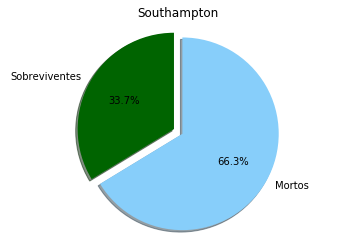

In [33]:
labels = 'Sobreviventes', 'Mortos'
sizes = [station_s_survived, station_s - station_s_survived]
colors = ['darkgreen', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.title("Southampton")
plt.show()

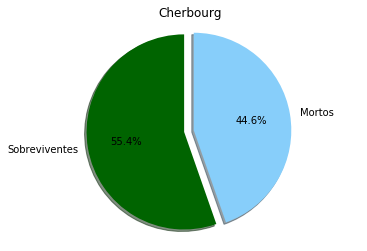

In [34]:
labels = 'Sobreviventes', 'Mortos'
sizes = [station_c_survived, station_c - station_c_survived]
colors = ['darkgreen', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.title("Cherbourg")
plt.show()

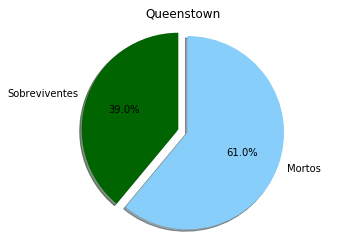

In [35]:
labels = 'Sobreviventes', 'Mortos'
sizes = [station_q_survived, station_q - station_q_survived]
colors = ['darkgreen', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.title("Queenstown")
plt.show()

### Conclusão da Resposta 5

Por incrível que pareça, passageiros que embarcaram na estação Cherbourg se saíram melhor no acidente. Enquanto as outras duas estações tiveram taxas de sobrevivência abaixo de 50%, 55,4% dos passageiros que embarcaram na estação Cherbourg conseguiram sobreviver.

### Conclusões

Após analisar os dados em questão, cheguei a conclusão de que a característica que mais influenciou na sobrevivência dos passageiros, foi o passageiro ser do sexo feminino. No geral, passageiros de primeira classe também obtiveram mais sucesso na sobrevivência.

Ainda em relação aos sobreviventes, a idade média desse grupo era de 28,44 anos, sendo 233 mulheres e 109 homens, totalizando um número de 342.

Dos passageiros analisados, a maioria era composto por adultos, sendo 778 passageiros, contra 45 jovens e 68 crianças.

Um ponto que chamou atenção foi o valor médio pago em dólares por passageiros de primeira classe, 84,15. É um valor muito maior do que os valores pagos por passageiros de segunda e terceira classe, 20,66, 13,67 respectivamente. Isso mostra a grande desigualdade social que havia na Europa, na época, e isso provavelmente refletia drasticamente nas condições de viagens de cada grupo de passageiros.


### Limitações

Após a primeira análise dos dados, notei que as colunas Cabin, Age e Embarked não haviam informações para algumas linhas.
Medidas tomadas:
 - Age: Foi colocado a idade média em relação aos outros passageiros
 - Cabin: Muitas linhas estavam em branco, e como é uma informação que não iria afetar no estudo, ela foi excluída
 - Embarked: apenas duas linhas estavam sem valores. Nada foi feito.
 
Também identifiquei que a coluna Ticket não agregaria ao estudo, e a mesma foi retirada do dataframe.